In [23]:
# Importing needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind, pearsonr, spearmanr, chi2_contingency, f_oneway

#Data Collection

*   Uploading CSV file.
*   Displaying first few Rows.
*   Displaying the count of Rows and Columns in the dataset.
*   Listing datatypes for the dataset coulmns.
*   Calculating some descriptive statistics.







In [24]:
# Uploading CSV file
from google.colab import files
upload = files.upload()
data = pd.read_csv("egypt_hotels_data.csv", encoding='latin-1')

Saving egypt_hotels_data.csv to egypt_hotels_data (1).csv


In [3]:
# Displaying first few Rows
data.head()

,Type,Name,Latitude,Longitude,Check-In Time,Check-Out Time,Overall Rating,Reviews,Location Rating,Amenities,Excluded Amenities,Essential Info,Nearby Places,Ratings Breakdown,Reviews Breakdown,Rate per Night (Lowest),Rate per Night (Before Taxes and Fees),Total Rate (Lowest),Total Rate (Before Taxes and Fees)
0,vacation rental,Pyramids Power Inn,29.972450,31.143061,3:00 PM,12:00 PM,4.8,53,4.1,"Air conditioning, Airport shuttle, Balcony, Ki...","No beach access, No elevator, No fitness cente...","Entire house, Sleeps 6, 3 bedrooms, 3 bathroom...",Ibrahim Al Afifi Alley (Al Mansoureyya Rd.): W...,NaN,NaN,"EGP 1,499","EGP 1,499","EGP 1,499","EGP 1,499"
1,hotel,Best View Pyramids Hotel,29.973594,31.141980,11:00 AM,11:00 AM,4.7,4615,4.3,"Breakfast, Free Wi-Fi, Free parking, Hot tub, ...",NaN,NaN,Great Sphinx of Giza: Walking - 9 min; Ibrahim...,"5 stars: 4120 reviews, 4 stars: 127 reviews, 3...","Service - Positive: 804, Negative: 65, Neutral...","EGP 1,964","EGP 1,662","EGP 1,964","EGP 1,662"
2,vacation rental,Dahab,28.510969,34.515739,3:00 PM,11:00 AM,0.0,0,3.0,"Air conditioning, Crib, Hot tub, Kitchen, Wash...","No airport shuttle, No balcony, No beach acces...","Entire apartment, Sleeps 2, 1 bedroom, 1 bathr...",Sharm El Sheikh International Airport: Taxi - ...,NaN,NaN,"EGP 1,108",EGP 964,"EGP 1,108",EGP 964
3,vacation rental,oasis hot spring,29.189199,25.559971,12:00 PM,11:00 AM,0.0,0,3.1,"Crib, Pet-friendly, Smoke-free, Free parking","No air conditioning, No airport shuttle, No ba...","Entire apartment, Sleeps 2, 1 bedroom, 1 bathr...",Marsa Matruh International Airport: Taxi - 3 h...,NaN,NaN,EGP 708,EGP 708,EGP 708,EGP 708
4,hotel,egypt pyramids inn,29.975123,31.141058,12:00 PM,12:00 PM,4.5,1077,4.3,"Breakfast, Free Wi-Fi, Free parking, Air condi...",NaN,NaN,Great Sphinx of Giza: Walking - 5 min; Abu Al ...,"5 stars: 841 reviews, 4 stars: 105 reviews, 3 ...","Service - Positive: 109, Negative: 19, Neutral...","EGP 2,360","EGP 2,047","EGP 2,360","EGP 2,047"


In [25]:
# Count of Rows and Columns in the dataset
data.shape

(947, 19)

In [26]:
# Quick Summary for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Type                                    947 non-null    object 
 1   Name                                    947 non-null    object 
 2   Latitude                                947 non-null    float64
 3   Longitude                               947 non-null    float64
 4   Check-In Time                           589 non-null    object 
 5   Check-Out Time                          661 non-null    object 
 6   Overall Rating                          947 non-null    float64
 7   Reviews                                 947 non-null    int64  
 8   Location Rating                         947 non-null    float64
 9   Amenities                               703 non-null    object 
 10  Excluded Amenities                      273 non-null    object

In [27]:
# Some descriptive Statistics
data.describe()

,Latitude,Longitude,Overall Rating,Reviews,Location Rating
count,947.000000,947.000000,947.000000,947.000000,947.000000
mean,28.693000,31.858008,3.709160,1442.645195,3.616895
std,2.076421,1.742959,1.582103,4574.171575,0.723664
min,22.337232,25.466989,0.000000,0.000000,0.000000
25%,27.221438,31.142306,3.600000,6.000000,3.100000
50%,29.971074,31.333634,4.300000,34.000000,3.700000
75%,30.048012,32.891233,4.700000,258.500000,4.200000
max,31.524534,34.977121,5.000000,44350.000000,4.800000


# Data Cleaning

* Outlier Removal: The data underwent a cleaning process to remove outliers, which are data points that fall significantly outside the expected range. Outliers can skew the analysis and distort the true picture.

*  Used the IQR method to deal with outliers.

*  Missing Value Handling: Missing values (also known as NaN values) were addressed.
*  Common methods include removing rows with missing values.



In [28]:
price_columns = [
    "Rate per Night (Lowest)",
    "Rate per Night (Before Taxes and Fees)",
    "Total Rate (Lowest)",
    "Total Rate (Before Taxes and Fees)"
]

def clean_price(value):
    if isinstance(value, str):
        value = value.replace("EGP", "").replace(",", "").replace(" ", "").strip()
        try:
            return float(value)
        except ValueError:
            return None
    return value

for col in price_columns:
    data[col] = data[col].apply(clean_price)

In [29]:
# Filling missing values:

# Fill numeric price data with median
median_values = {}
for col in price_columns:
    median_values[col] = data[col].median()
    data[col].fillna(median_values[col], inplace=True)


# Fill missing text columns with "Not Provided"
text_columns = [
    "Check-In Time", "Check-Out Time", "Amenities", "Excluded Amenities",
    "Essential Info", "Ratings Breakdown", "Reviews Breakdown"
]

for col in text_columns:
    data[col].fillna("Not Provided", inplace=True)

<ipython-input-29-983f31667b36>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_values[col], inplace=True)
<ipython-input-29-983f31667b36>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [30]:
# Confirm the cleaning
print(data.info())
print(data[price_columns].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Type                                    947 non-null    object 
 1   Name                                    947 non-null    object 
 2   Latitude                                947 non-null    float64
 3   Longitude                               947 non-null    float64
 4   Check-In Time                           947 non-null    object 
 5   Check-Out Time                          947 non-null    object 
 6   Overall Rating                          947 non-null    float64
 7   Reviews                                 947 non-null    int64  
 8   Location Rating                         947 non-null    float64
 9   Amenities                               947 non-null    object 
 10  Excluded Amenities                      947 non-null    object

In [31]:
# Find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 9 numerical variables

The numerical variables are :

 ['Latitude', 'Longitude', 'Overall Rating', 'Reviews', 'Location Rating', 'Rate per Night (Lowest)', 'Rate per Night (Before Taxes and Fees)', 'Total Rate (Lowest)', 'Total Rate (Before Taxes and Fees)']


In [32]:
# Find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 10 categorical variables

The categorical variables are :

 ['Type', 'Name', 'Check-In Time', 'Check-Out Time', 'Amenities', 'Excluded Amenities', 'Essential Info', 'Nearby Places', 'Ratings Breakdown', 'Reviews Breakdown']


In [33]:
data.describe()

,Latitude,Longitude,Overall Rating,Reviews,Location Rating,Rate per Night (Lowest),Rate per Night (Before Taxes and Fees),Total Rate (Lowest),Total Rate (Before Taxes and Fees)
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,28.693000,31.858008,3.709160,1442.645195,3.616895,3865.460401,3095.621964,3865.460401,3095.621964
std,2.076421,1.742959,1.582103,4574.171575,0.723664,7581.567376,6143.351993,7581.567376,6143.351993
min,22.337232,25.466989,0.000000,0.000000,0.000000,188.000000,73.000000,188.000000,73.000000
25%,27.221438,31.142306,3.600000,6.000000,3.100000,949.000000,777.000000,949.000000,777.000000
50%,29.971074,31.333634,4.300000,34.000000,3.700000,1498.000000,1168.000000,1498.000000,1168.000000
75%,30.048012,32.891233,4.700000,258.500000,4.200000,3216.500000,2570.000000,3216.500000,2570.000000
max,31.524534,34.977121,5.000000,44350.000000,4.800000,67163.000000,58403.000000,67163.000000,58403.000000


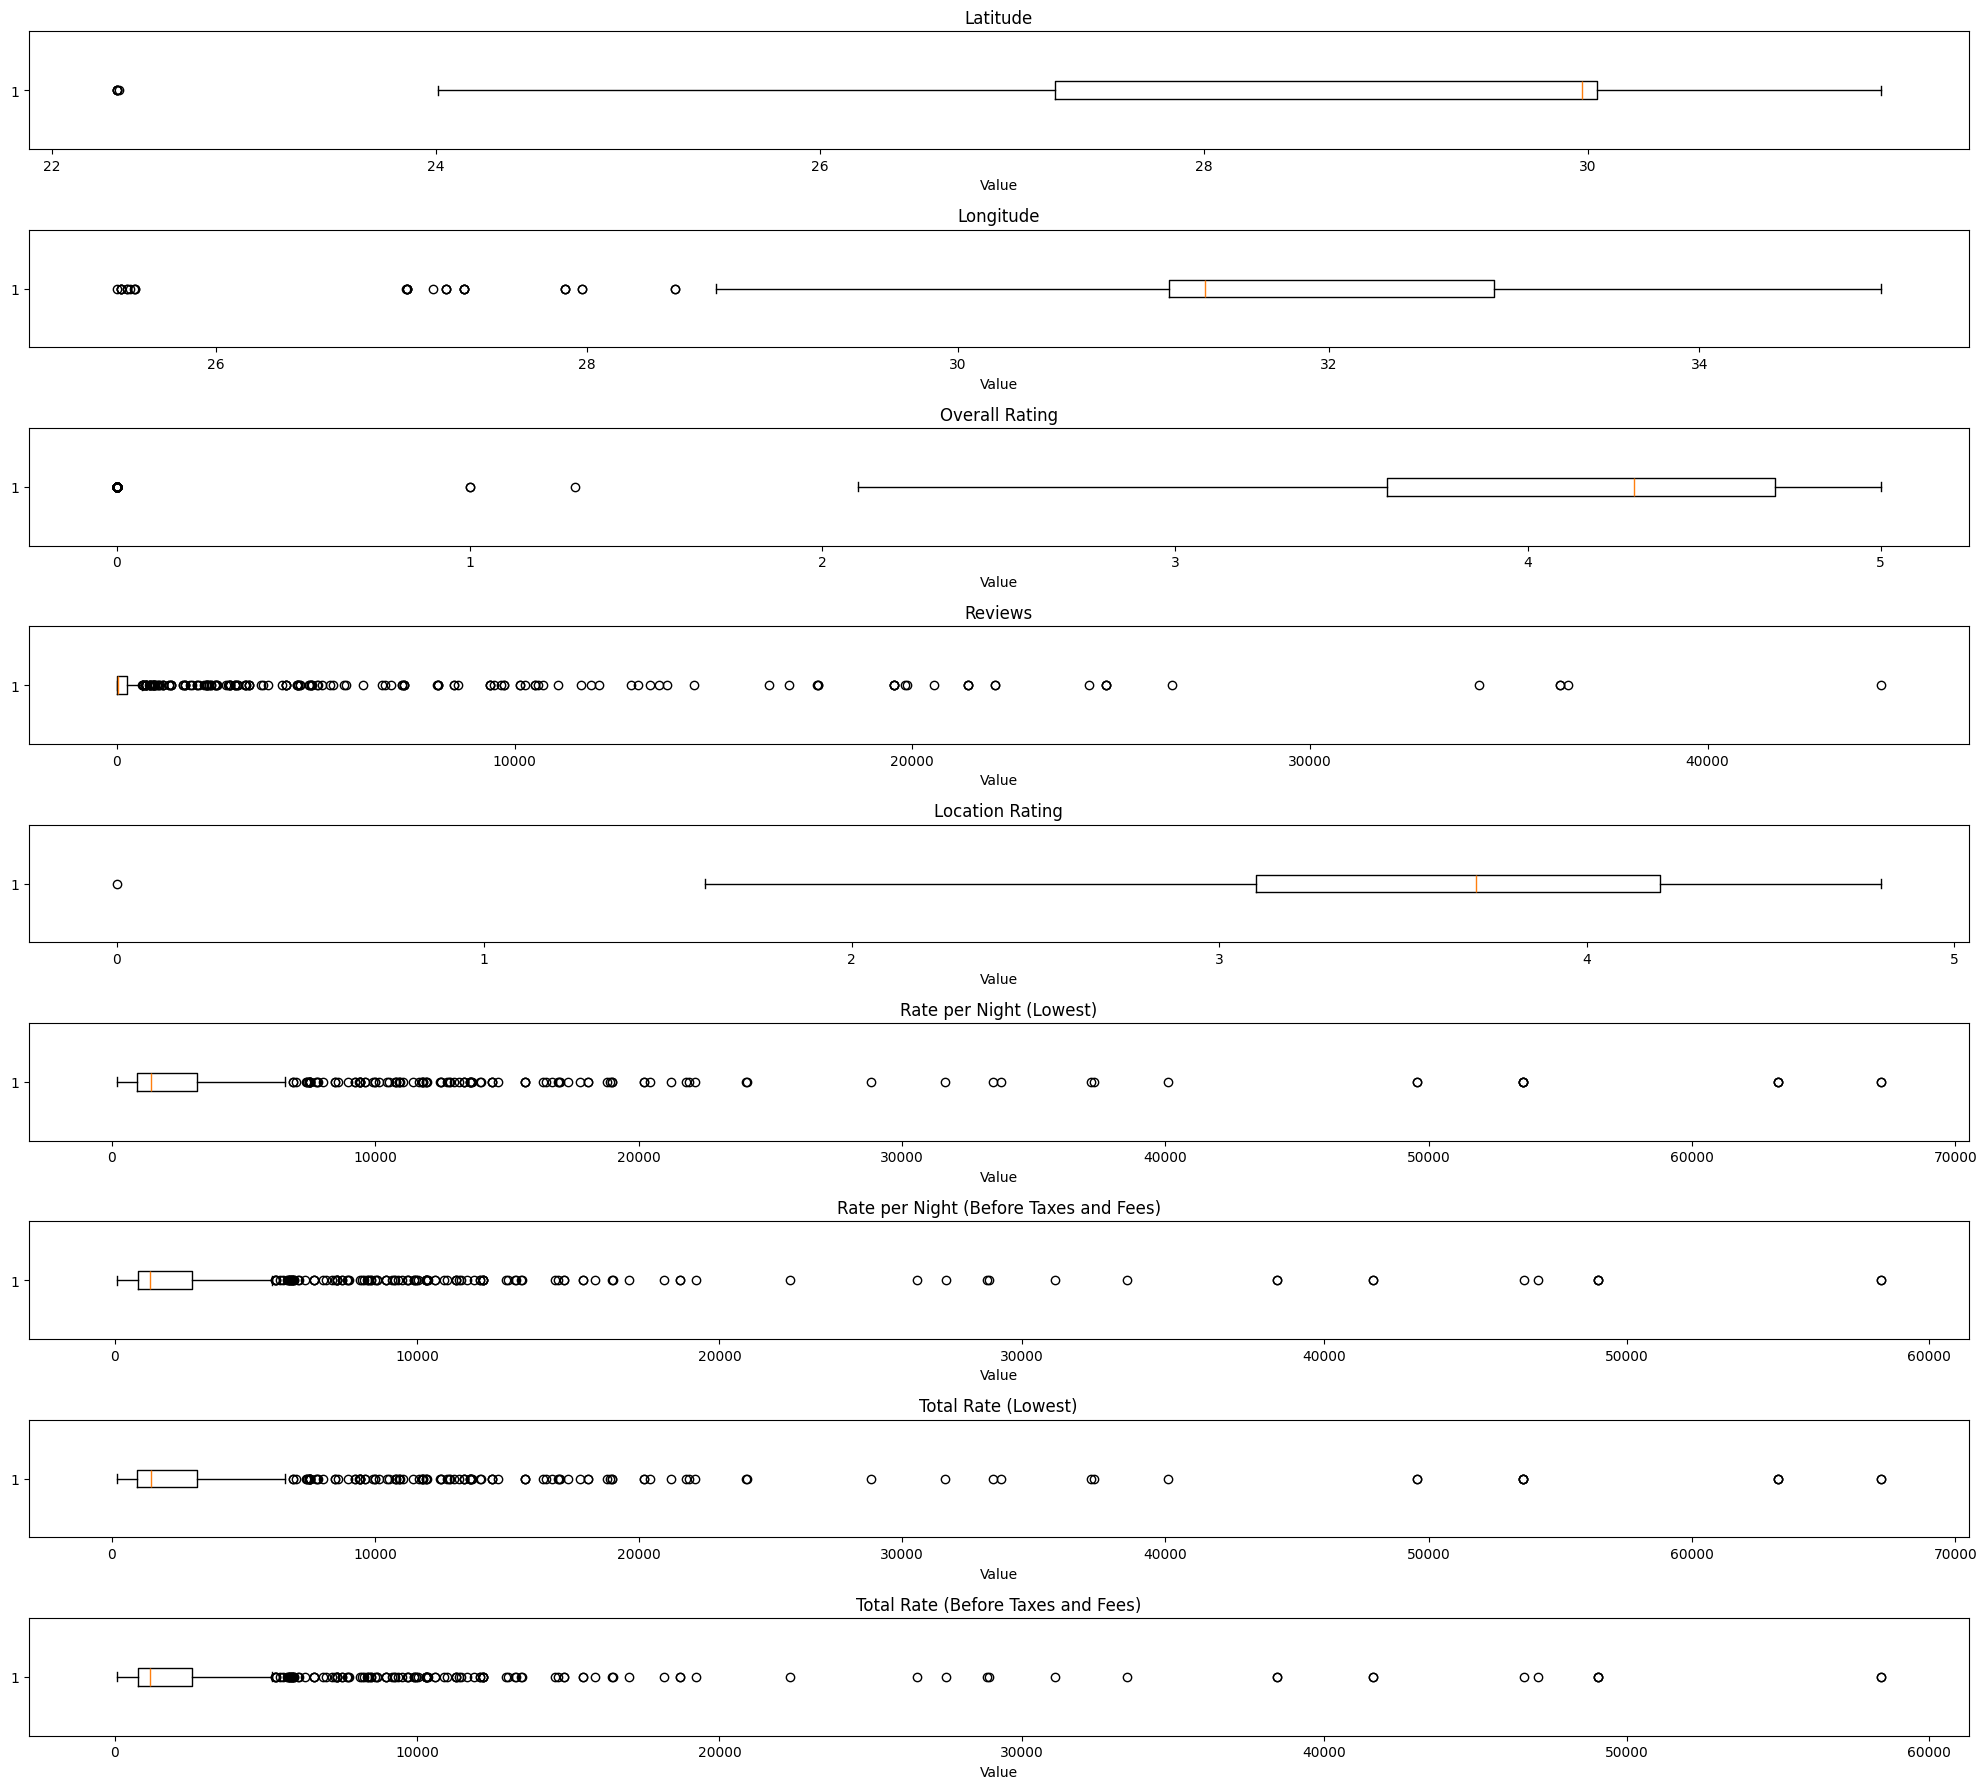

In [34]:
# Box Plot (before removing outliers)
numeric_columns = data.select_dtypes(include='number').columns

# Create box plots for all numeric columns
plt.figure(figsize=(20, len(numeric_columns) * 2))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [35]:
columns_to_analyze = data.select_dtypes(include='number').columns

# Apply the IQR method to cap outliers
for column in columns_to_analyze:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below lower_bound
    data.loc[data[column] < lower_bound, column] = lower_bound
    # Cap values above upper_bound
    data.loc[data[column] > upper_bound, column] = upper_bound

data.head()

<ipython-input-35-ae00a8e9f721>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-372.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower_bound, column] = lower_bound


,Type,Name,Latitude,Longitude,Check-In Time,Check-Out Time,Overall Rating,Reviews,Location Rating,Amenities,Excluded Amenities,Essential Info,Nearby Places,Ratings Breakdown,Reviews Breakdown,Rate per Night (Lowest),Rate per Night (Before Taxes and Fees),Total Rate (Lowest),Total Rate (Before Taxes and Fees)
0,vacation rental,Pyramids Power Inn,29.972450,31.143061,3:00 PM,12:00 PM,4.80,53.00,4.1,"Air conditioning, Airport shuttle, Balcony, Ki...","No beach access, No elevator, No fitness cente...","Entire house, Sleeps 6, 3 bedrooms, 3 bathroom...",Ibrahim Al Afifi Alley (Al Mansoureyya Rd.): W...,Not Provided,Not Provided,1499.0,1499.0,1499.0,1499.0
1,hotel,Best View Pyramids Hotel,29.973594,31.141980,11:00 AM,11:00 AM,4.70,637.25,4.3,"Breakfast, Free Wi-Fi, Free parking, Hot tub, ...",Not Provided,Not Provided,Great Sphinx of Giza: Walking - 9 min; Ibrahim...,"5 stars: 4120 reviews, 4 stars: 127 reviews, 3...","Service - Positive: 804, Negative: 65, Neutral...",1964.0,1662.0,1964.0,1662.0
2,vacation rental,Dahab,28.510969,34.515739,3:00 PM,11:00 AM,1.95,0.00,3.0,"Air conditioning, Crib, Hot tub, Kitchen, Wash...","No airport shuttle, No balcony, No beach acces...","Entire apartment, Sleeps 2, 1 bedroom, 1 bathr...",Sharm El Sheikh International Airport: Taxi - ...,Not Provided,Not Provided,1108.0,964.0,1108.0,964.0
3,vacation rental,oasis hot spring,29.189199,28.518916,12:00 PM,11:00 AM,1.95,0.00,3.1,"Crib, Pet-friendly, Smoke-free, Free parking","No air conditioning, No airport shuttle, No ba...","Entire apartment, Sleeps 2, 1 bedroom, 1 bathr...",Marsa Matruh International Airport: Taxi - 3 h...,Not Provided,Not Provided,708.0,708.0,708.0,708.0
4,hotel,egypt pyramids inn,29.975123,31.141058,12:00 PM,12:00 PM,4.50,637.25,4.3,"Breakfast, Free Wi-Fi, Free parking, Air condi...",Not Provided,Not Provided,Great Sphinx of Giza: Walking - 5 min; Abu Al ...,"5 stars: 841 reviews, 4 stars: 105 reviews, 3 ...","Service - Positive: 109, Negative: 19, Neutral...",2360.0,2047.0,2360.0,2047.0


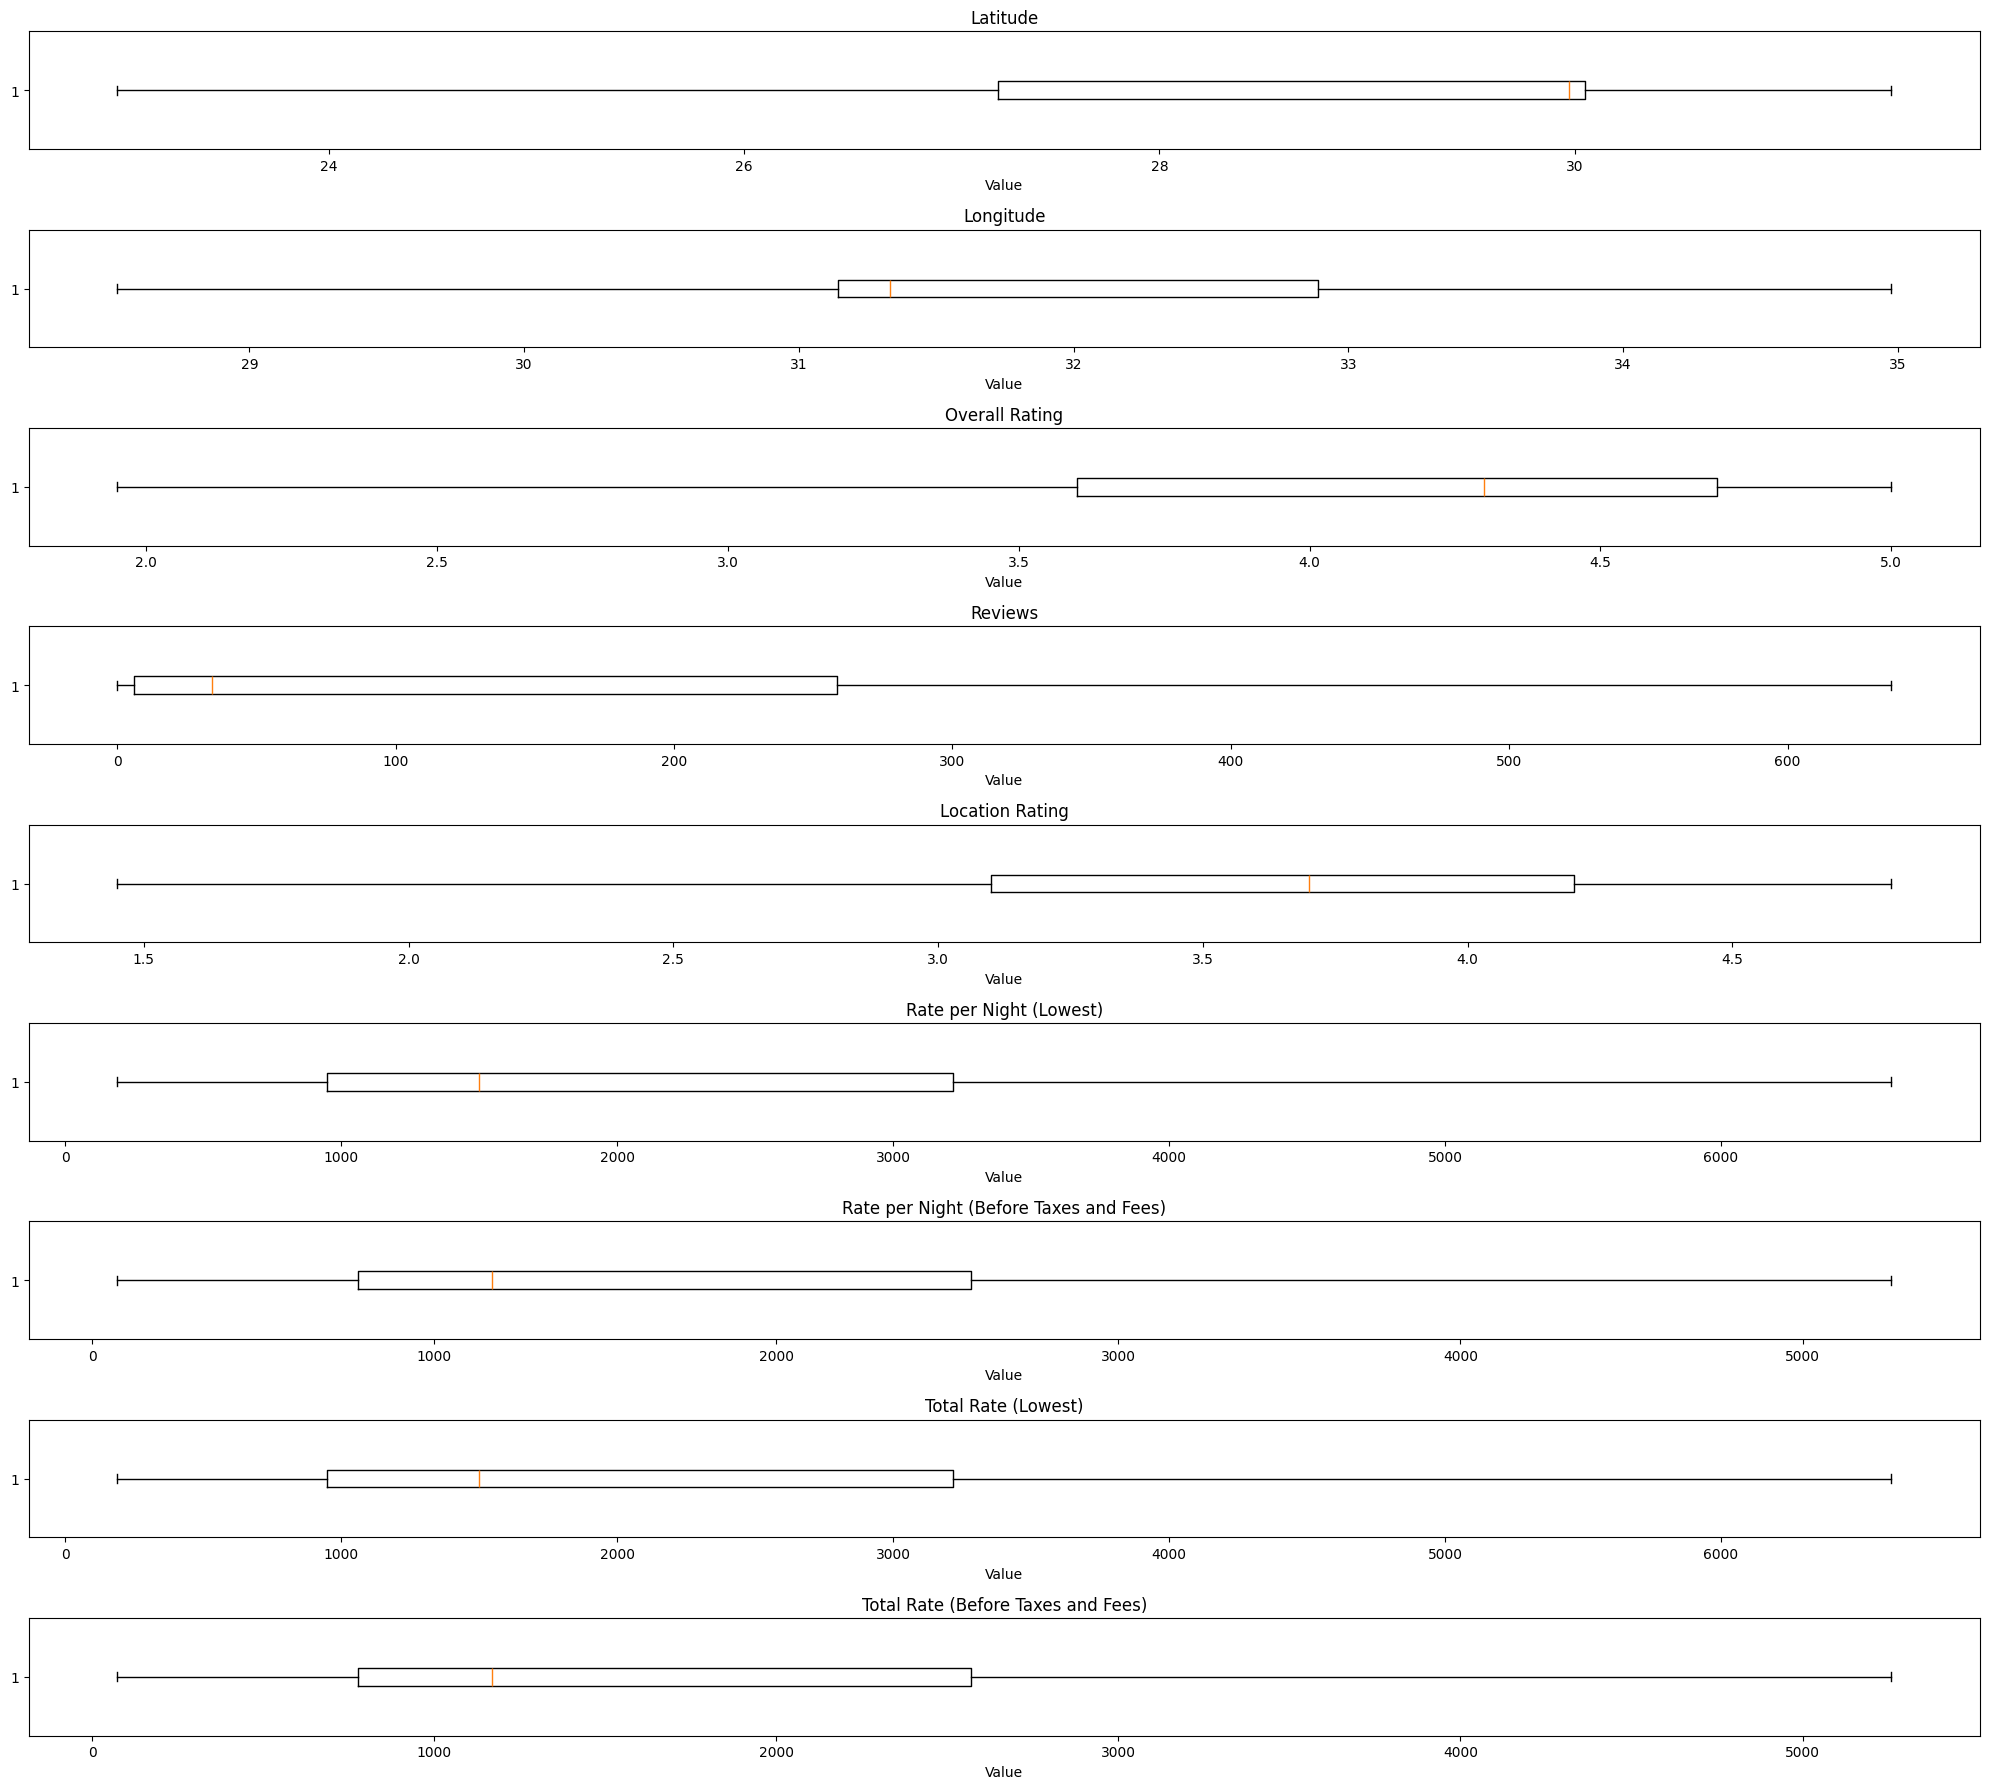

In [36]:
# Box Plot (after removing outliers)
numeric_columns = data.select_dtypes(include='number').columns

# Create box plots for all numeric columns
plt.figure(figsize=(20, len(numeric_columns) * 2))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

# Correlation Analysis


In [38]:
#  Calculate the correlation between Rate per Night and Overall Rating
correlation_value = data['Rate per Night (Lowest)'].corr(data['Overall Rating'])

#  Print the correlation result
print(f"The correlation between Rate per Night and Overall Rating is: {correlation_value:.3f}")

The correlation between Rate per Night and Overall Rating is: 0.373


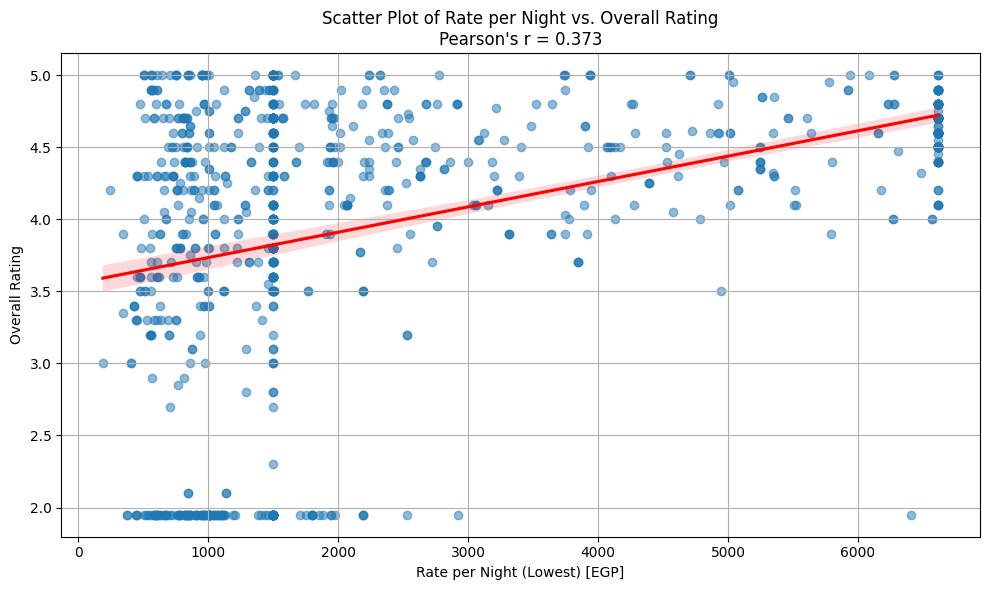

In [39]:
# Plotting the scatter plot with a regression line

subset = data[['Rate per Night (Lowest)', 'Overall Rating']].dropna()

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Rate per Night (Lowest)',
    y='Overall Rating',
    data=subset,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title(f'Scatter Plot of Rate per Night vs. Overall Rating\nPearson\'s r = {correlation_value:.3f}')
plt.xlabel('Rate per Night (Lowest) [EGP]')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
subset = data[['Rate per Night (Lowest)', 'Location Rating']].dropna()
correlation_value, _ = pearsonr(subset['Rate per Night (Lowest)'], subset['Location Rating'])

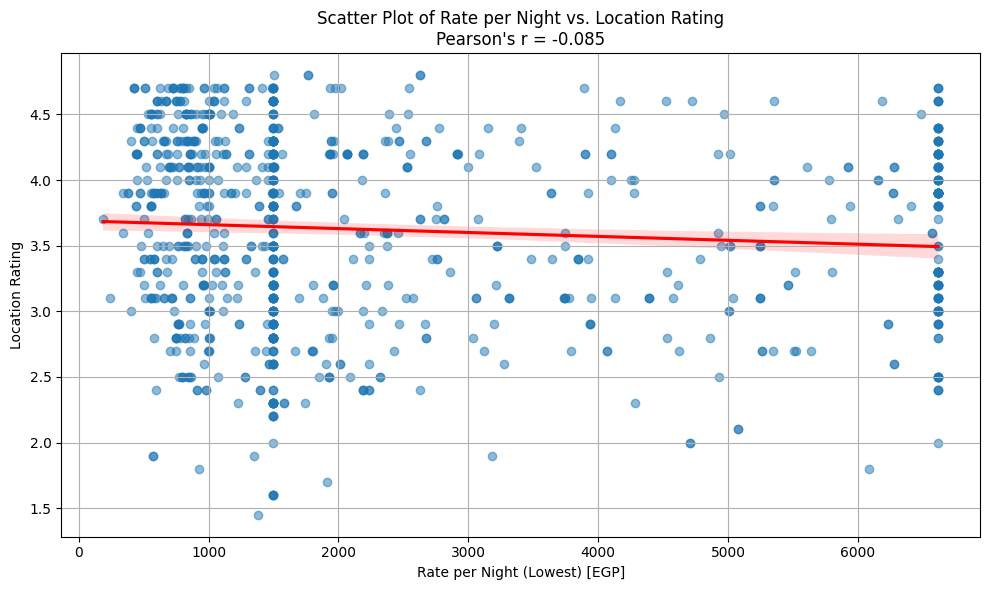

In [41]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Rate per Night (Lowest)',
    y='Location Rating',
    data=subset,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title(f'Scatter Plot of Rate per Night vs. Location Rating\nPearson\'s r = {correlation_value:.3f}')
plt.xlabel('Rate per Night (Lowest) [EGP]')
plt.ylabel('Location Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
#  Calculate the correlation between Overall Rating and Reviews
correlation_value = data['Overall Rating'].corr(data['Reviews'])

#  Print the correlation result
print(f"The correlation between Overall Rating and Reviews is: {correlation_value:.3f}")

The correlation between Overall Rating and Reviews is: 0.238


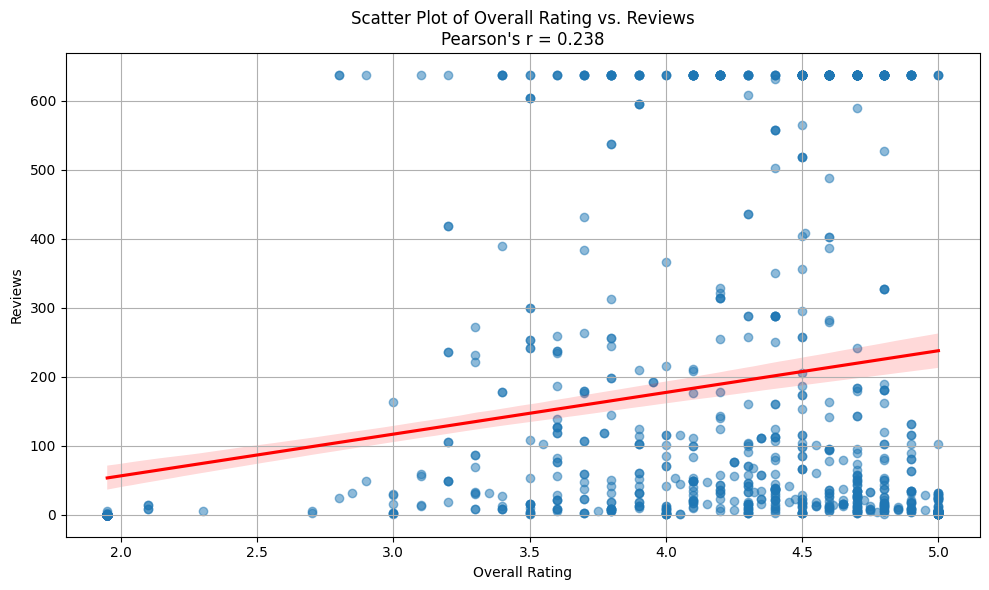

In [43]:
# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Overall Rating',
    y='Reviews',
    data=data,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title(f'Scatter Plot of Overall Rating vs. Reviews\nPearson\'s r = {correlation_value:.3f}')
plt.xlabel('Overall Rating')
plt.ylabel('Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

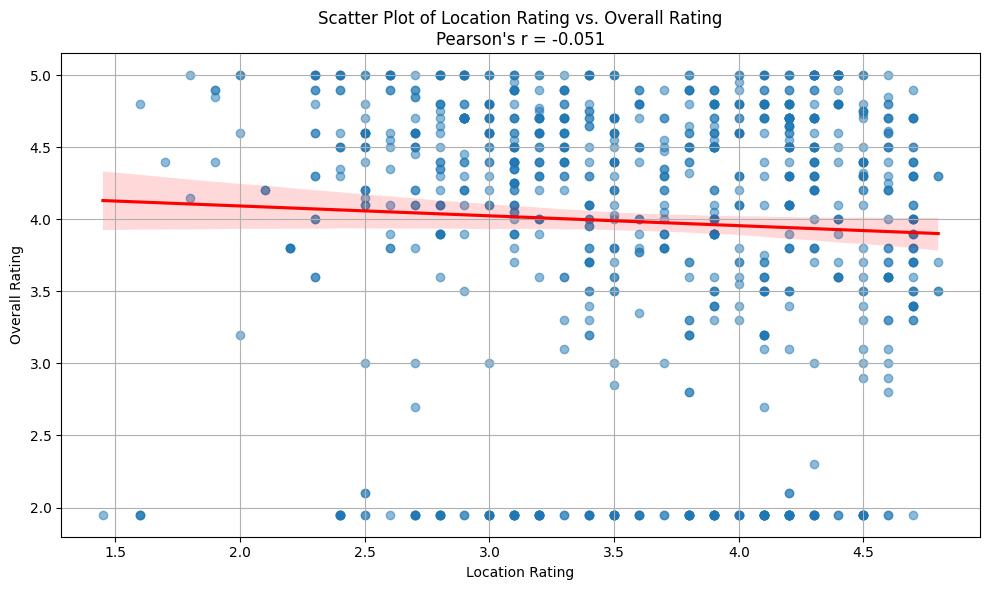

In [44]:
subset = data[['Location Rating', 'Overall Rating']].dropna()
correlation_value, _ = pearsonr(subset['Location Rating'], subset['Overall Rating'])

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Location Rating',
    y='Overall Rating',
    data=subset,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title(f'Scatter Plot of Location Rating vs. Overall Rating\nPearson\'s r = {correlation_value:.3f}')
plt.xlabel('Location Rating')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


# Hypothesis Testing


In [63]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Overall Rating'] = pd.to_numeric(data['Overall Rating'], errors='coerce')

data_reviews_rating = data[['Reviews', 'Overall Rating']].dropna()
data_reviews_rating = data_reviews_rating[data_reviews_rating['Reviews'] > 0]

bins = [0, 50, 500, 2000, 5000, 10000, float('inf')]
labels = ['0–50', '51–500', '501–2000', '2001–5000', '5001–10000', '10000+']
data_reviews_rating['Review Group'] = pd.cut(data_reviews_rating['Reviews'], bins=bins, labels=labels, right=False)

print("\nReview Group Sizes:")
print(data_reviews_rating['Review Group'].value_counts())

grouped_ratings = [group['Overall Rating'].values for _, group in data_reviews_rating.groupby('Review Group') if len(group) > 1 and group['Overall Rating'].nunique() > 1]

if len(grouped_ratings) >= 2:
    f_stat, p_val = f_oneway(*grouped_ratings)
    alpha = 0.05
    print("\nANOVA Test Results for Review Count Group vs. Overall Rating:")
    print(f"F-statistic: {f_stat:.6f}")
    print(f"P-value: {p_val:.10f}")
    if p_val < alpha:
        print(f"Conclusion: Since the p-value ({p_val:.10f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
        print("There is a significant difference in guest satisfaction (Overall Rating) across different review volume groups.")
    else:
        print(f"Conclusion: Since the p-value ({p_val:.10f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
        print("There is no significant difference in guest satisfaction (Overall Rating) across different review volume groups.")
else:
    print("\nCannot perform ANOVA test. Need at least two distinct review groups with variability.")



Review Group Sizes:
Review Group
0–50          398
51–500        221
501–2000      197
2001–5000       0
5001–10000      0
10000+          0
Name: count, dtype: int64

ANOVA Test Results for Review Count Group vs. Overall Rating:
F-statistic: 7.650567
P-value: 0.0005108351
Conclusion: Since the p-value (0.0005108351) is less than the significance level (0.05), we reject the null hypothesis.
There is a significant difference in guest satisfaction (Overall Rating) across different review volume groups.


<ipython-input-63-c332a418dfbf>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_ratings = [group['Overall Rating'].values for _, group in data_reviews_rating.groupby('Review Group') if len(group) > 1 and group['Overall Rating'].nunique() > 1]


In [62]:
import pandas as pd
from scipy.stats import f_oneway

data['Overall Rating'] = pd.to_numeric(data['Overall Rating'], errors='coerce')
data['Location Group'] = pd.cut(data['Latitude'], bins=5, labels=['Loc1','Loc2','Loc3','Loc4','Loc5'])
data_location_rating = data[['Location Group', 'Overall Rating']].dropna()
grouped_ratings = [group['Overall Rating'].values for _, group in data_location_rating.groupby('Location Group') if len(group) > 1 and group['Overall Rating'].nunique() > 1]

if len(grouped_ratings) >= 2:
    f_stat, p_val = f_oneway(*grouped_ratings)
    alpha = 0.05
    print("\nANOVA Test Results for Location Group vs. Overall Rating:")
    print(f"F-statistic: {f_stat:.8f}")
    print(f"P-value: {p_val:.8f}")
    if p_val < alpha:
        print(f"Conclusion: Since the p-value ({p_val:.8f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
        print("We reject the null hypothesis.")
        print("There is a significant difference in guest satisfaction (Overall Rating) across different location groups.")
    else:
        print(f"Conclusion: Since the p-value ({p_val:.8f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
        print("We fail to reject the null hypothesis.")
        print("There is no significant difference in guest satisfaction (Overall Rating) across different location groups.")
else:
    print("\nCannot perform ANOVA test. Need at least two distinct location groups with variability.")



ANOVA Test Results for Location Group vs. Overall Rating:
F-statistic: 1.18422693
P-value: 0.31613398
Conclusion: Since the p-value (0.31613398) is greater than the significance level (0.05), we fail to reject the null hypothesis.
We fail to reject the null hypothesis.
There is no significant difference in guest satisfaction (Overall Rating) across different location groups.


<ipython-input-62-2f9477ff3514>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_ratings = [group['Overall Rating'].values for _, group in data_location_rating.groupby('Location Group') if len(group) > 1 and group['Overall Rating'].nunique() > 1]


In [60]:
from scipy.stats import pearsonr

x = data['Rate per Night (Lowest)'].dropna()
y = data.loc[x.index, 'Overall Rating'].dropna()
common_index = x.index.intersection(y.index)
x = x.loc[common_index]
y = y.loc[common_index]

corr_coef, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value:.12f}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Significant correlation exists.")
else:
    print("Fail to reject null hypothesis: No significant correlation.")


Pearson correlation coefficient: 0.37299877176153806
P-value: 0.000000000000
Reject null hypothesis: Significant correlation exists.


# Data Visualization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

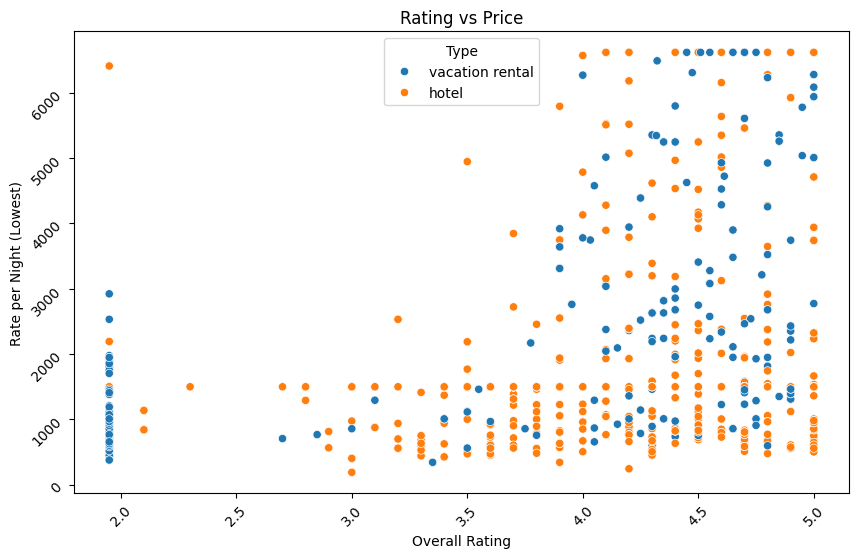

In [40]:
# Scatter Plot: Rating vs Price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Overall Rating", y="Rate per Night (Lowest)", hue="Type")
plt.title("Rating vs Price")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt

# Conclusion: Check if higher-rated places charge more (positive slope) or not.

<ipython-input-56-b190c712c2c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Type", y="Rate per Night (Lowest)", palette="Set3")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

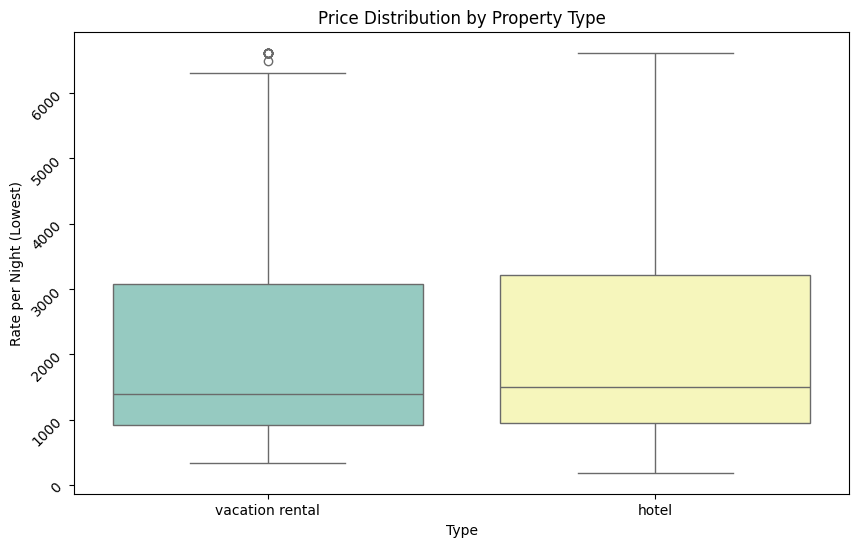

In [56]:
# Box Plot: Price by Property Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Type", y="Rate per Night (Lowest)", palette="Set3")
plt.title("Price Distribution by Property Type")
plt.yticks(rotation=45)
plt

# Conclusion: See which type tends to be more expensive and if prices vary widely.

<ipython-input-57-b3f5f40e7e0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating, x="Type", y="Overall Rating", palette="viridis")


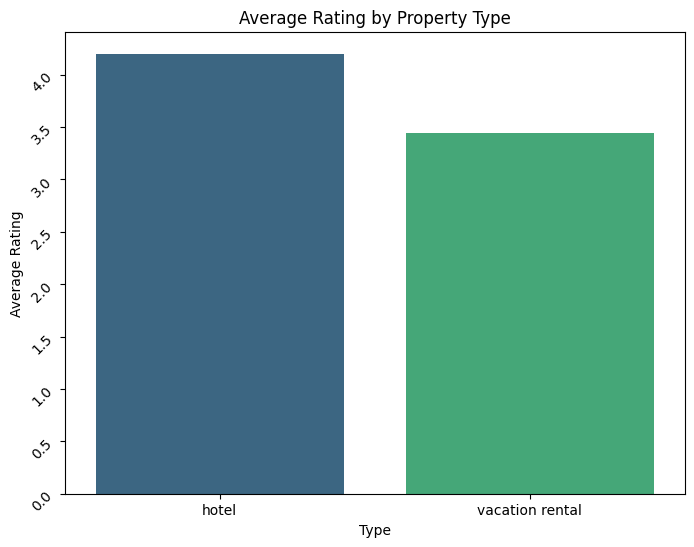

In [57]:
# Bar Plot: Average Rating by Type
plt.figure(figsize=(8, 6))
avg_rating = data.groupby("Type")["Overall Rating"].mean().reset_index()
sns.barplot(data=avg_rating, x="Type", y="Overall Rating", palette="viridis")
plt.title("Average Rating by Property Type")
plt.ylabel("Average Rating")
plt.yticks(rotation=45)
plt.show()

# Conclusion: Are hotels or vacation rentals rated higher?

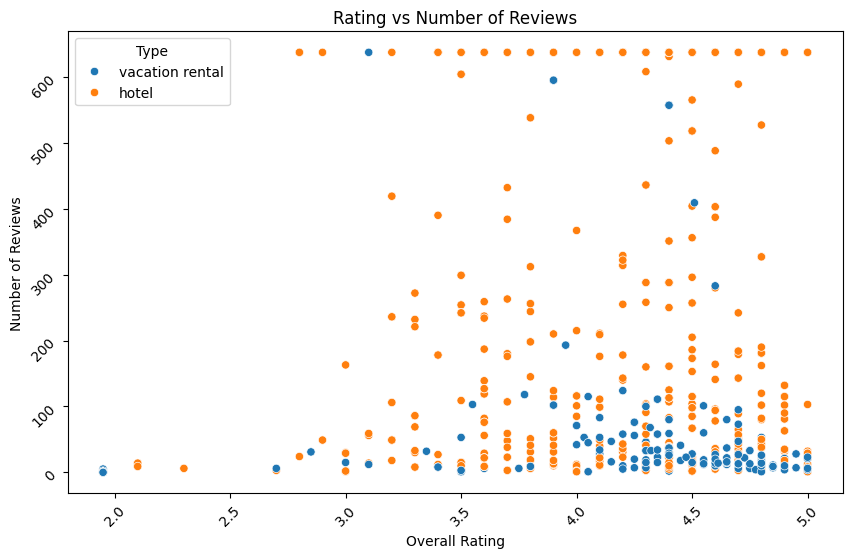

In [43]:
# Scatter Plot: Number of Reviews vs Overall Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Overall Rating", y="Reviews", hue="Type")
plt.title("Rating vs Number of Reviews")
plt.xlabel("Overall Rating")
plt.ylabel("Number of Reviews")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

# Conclusion: Do more-reviewed listings tend to be better rated?

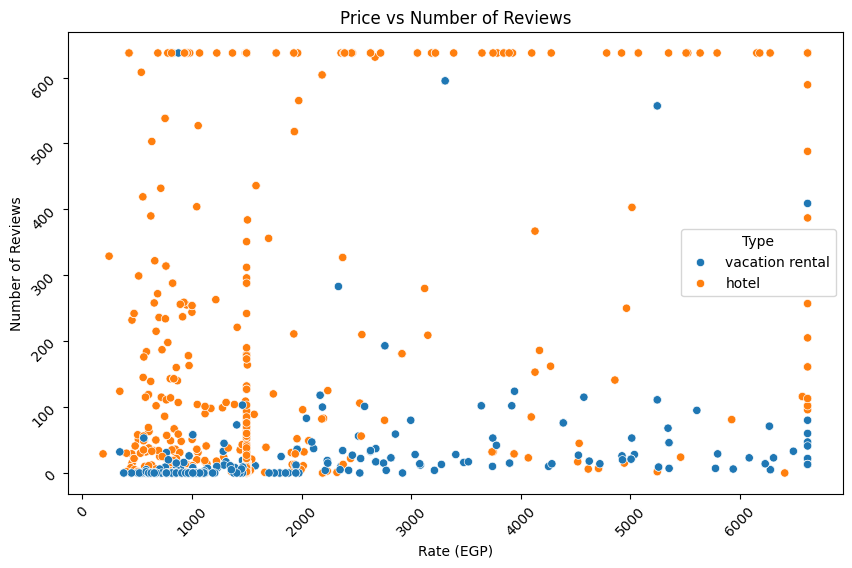

In [51]:
# Price vs Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Rate per Night (Lowest)", y="Reviews", hue="Type") # Changed "Cleaned Rate" to "Rate per Night (Lowest)" and "Number of Reviews" to "Reviews"
plt.title("Price vs Number of Reviews")
plt.xlabel("Rate (EGP)")
plt.ylabel("Number of Reviews")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

# Conclusion: Expensive hotels might have fewer reviews (exclusive) or more (luxury attention).

<ipython-input-20-533cb6522a73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="Type", y="Rate per Night (Lowest)", palette="Set2")


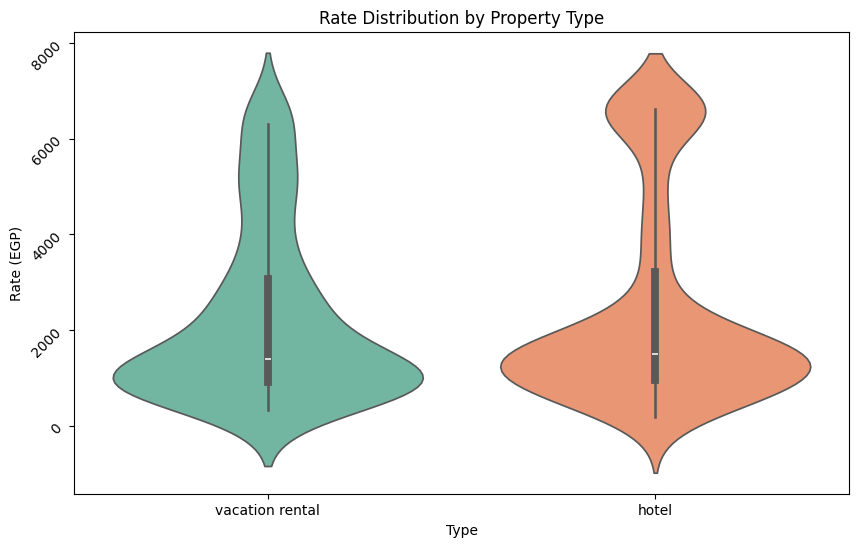

In [20]:
# Violin Plot: Price Distribution by Type
plt.figure(figsize=(10, 6))
# Changed "Cleaned Rate" to "Rate per Night (Lowest)" which was cleaned earlier
sns.violinplot(data=data, x="Type", y="Rate per Night (Lowest)", palette="Set2")
plt.title("Rate Distribution by Property Type")
plt.ylabel("Rate (EGP)")
plt.yticks(rotation=45)
plt.show()

# Conclusion: Shows variation and skew in prices between hotels and vacation rentals.

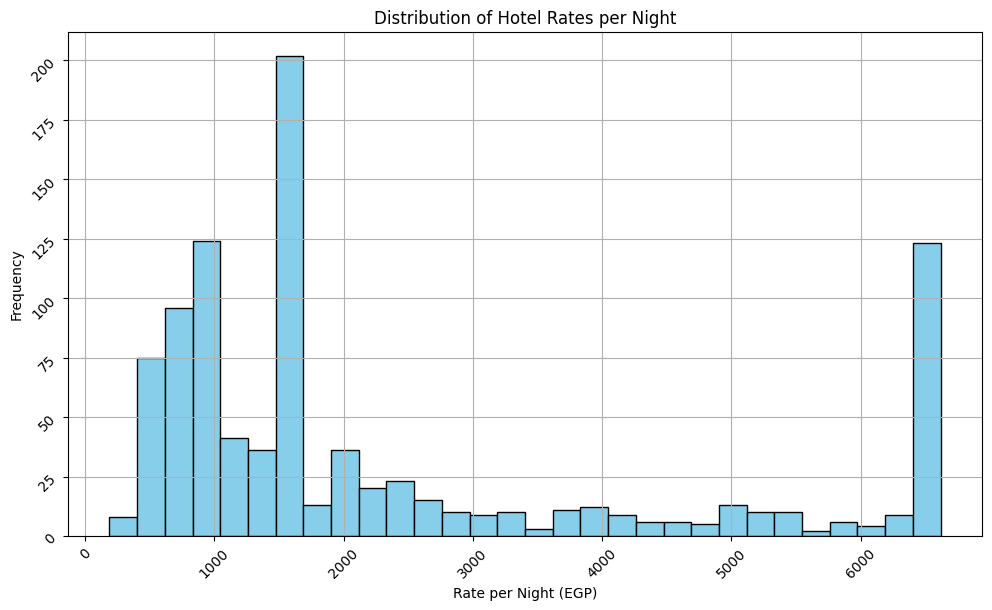

In [55]:
# Histogram - Rate per Night Distribution
plt.figure(figsize=(10, 6))
plt.hist(data["Rate per Night (Lowest)"].dropna(), bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Hotel Rates per Night")
plt.xlabel("Rate per Night (EGP)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

# Conclusion: Helps spot price clusters and popular price points.

In [ ]:
# Drop entries without lat/lon
map_df = data.dropna(subset=["Latitude", "Longitude"]) 

# Interactive map of listings
fig = px.scatter_mapbox(
    map_df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Name",
    hover_data=["Type", "Overall Rating", "Rate per Night (Lowest)"], 
    color="Overall Rating",
    size="Rate per Night (Lowest)", 
    zoom=4.5,
    height=600
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Hotel & Rental Locations in Egypt")
fig.show()